In [13]:
import numpy as np
from tensorflow import keras
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import load_img,img_to_array
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from keras.models import Sequential 
from keras.utils import np_utils
from keras.layers import Dense,Activation,Dropout,LSTM,BatchNormalization
from keras.layers import Flatten
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.utils import to_categorical
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D

170508288/170498071 [==============================] - 17s 0us/step


<function matplotlib.pyplot.show>

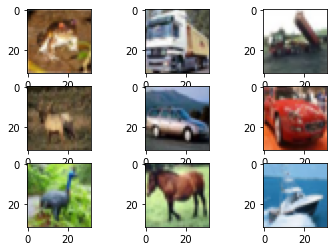

In [6]:
from keras.datasets import cifar10
(x_train,y_train),(x_test,y_test)=cifar10.load_data()
import matplotlib.pyplot as plt
for i in range(9):
    plt.subplot(330+i+1)
    plt.imshow(x_train[i])
plt.show

In [7]:
from tensorflow.keras.utils import to_categorical
x_train=x_train.astype('float32') #gán kiểu dữ liệu
x_test=x_test.astype('float32')
x_train/=255
x_test/=255
y_train=to_categorical(y_train)
y_test=to_categorical(y_test)


In [8]:
from keras.models import Sequential
from keras.models import Model
from keras.layers import Input, Dense
model=Sequential()

In [9]:
from keras.layers.core.flatten import Flatten
model.add(Flatten())
model.add(Dense(128,activation='relu',kernel_initializer='he_uniform'))
model.add(Dense(10,activation='softmax'))

In [12]:
from tensorflow.keras.optimizers import SGD
opt = SGD(lr = 0.01, momentum = 0.9)
model.compile(loss = 'categorical_crossentropy', optimizer = opt, metrics = ['accuracy'])
history = model.fit(x_train,y_train,batch_size=64,epochs = 30,verbose = 1,validation_data=[x_test,y_test])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 1/30
782/782 [==============================] - 7s 8ms/step - loss: 1.8559 - accuracy: 0.3315 - val_loss: 1.7355 - val_accuracy: 0.3863
Epoch 2/30
782/782 [==============================] - 5s 7ms/step - loss: 1.7054 - accuracy: 0.3888 - val_loss: 1.6471 - val_accuracy: 0.4130
Epoch 3/30
782/782 [==============================] - 6s 7ms/step - loss: 1.6506 - accuracy: 0.4132 - val_loss: 1.6044 - val_accuracy: 0.4314
Epoch 4/30
782/782 [==============================] - 6s 7ms/step - loss: 1.6173 - accuracy: 0.4233 - val_loss: 1.5966 - val_accuracy: 0.4285
Epoch 5/30
782/782 [==============================] - 6s 7ms/step - loss: 1.5833 - accuracy: 0.4372 - val_loss: 1.5801 - val_accuracy: 0.4362
Epoch 6/30
782/782 [==============================] - 5s 7ms/step - loss: 1.5605 - accuracy: 0.4445 - val_loss: 1.5609 - val_accuracy: 0.4412
Epoch 7/30
782/782 [==============================] - 5s 7ms/step - loss: 1.5369 - accuracy: 0.4518 - val_loss: 1.5479 - val_accuracy: 0.4480
Epoch 

In [14]:
model.save('10convat.h5')

In [15]:
from tensorflow.keras.models import load_model
model1=load_model('10convat.h5')

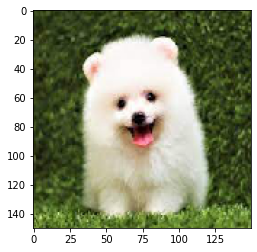

In [16]:
import matplotlib.pyplot as plt
from tensorflow.keras.utils import load_img, img_to_array
img = load_img('/content/drive/MyDrive/Colab Notebooks/cifar10convat/chó.jpg', target_size=(150,150))
plt.imshow(img)

array([7])

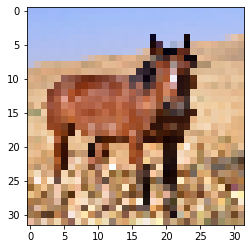

In [19]:
img=load_img('/content/Hesp.jpg',target_size=(32,32))
plt.imshow(img)
img=img_to_array(img)
img=img.reshape(1,32,32,3)
img=img.astype('float32')
img=img/255
np.argmax(model.predict(img),axis=1)